In [1]:
%matplotlib inline
import seaborn as sns
# Set default Seaborn style
sns.set()
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import scipy
import os 
import sys
import csv
import scipy.io



In [2]:
### load gene count matrix
### it is in coo matrix format
##COO is a fast format for constructing sparse matrices
mat = scipy.io.mmread("matrix.mtx")
#mat = mat.todense()

In [3]:
## get gene information
genes_path ="genes.tsv"
gene_ids = [row[0] for row in csv.reader(open(genes_path), delimiter="\t")]
gene_names = [row[1] for row in csv.reader(open(genes_path), delimiter="\t")]


In [4]:
## get barcode information information
barcodes_path = "barcodes.tsv"
barcodes = [row[0] for row in csv.reader(open(barcodes_path), delimiter="\t")]
print barcodes[0:5]
barcodes= map(lambda x:x.split("-")[0], barcodes)
print barcodes[0:5]

['AAACCTGAGCCCAGCT-1', 'AAACCTGAGCCGATTT-1', 'AAACCTGAGTCTCAAC-1', 'AAACCTGCACGTGAGA-1', 'AAACCTGCAGGAACGT-1']
['AAACCTGAGCCCAGCT', 'AAACCTGAGCCGATTT', 'AAACCTGAGTCTCAAC', 'AAACCTGCACGTGAGA', 'AAACCTGCAGGAACGT']


In [83]:
featureData=pd.DataFrame(data=gene_names,index=gene_ids,columns=['Associated.Gene.Name'])
featureData['Chromosome.Name']=1
featureData.ix['ENSGGENES']=['Genes',1]
featureData.ix['ENSGUMI']=['Umi',1]
featureData.head()
featureData.tail()


,Associated.Gene.Name,Chromosome.Name
ENSMUSG00000095742,CAAA01147332.1,1
mTomato,gmTomato,1
gfp,ggfp,1
ENSGGENES,Genes,1
ENSGUMI,Umi,1


In [30]:
counts=pd.DataFrame(index=gene_names,columns=barcodes,data=mat.todense())
counts.head(n=5)
counts.index.name = 'gene_name'
counts.reset_index(inplace=True)
print counts.head(n=5)
#counts.to_csv("NeuralCrest_scRNAseq_10x1_counts.tsv", sep='\t')
print counts.shape

  gene_name  AAACCTGAGCCCAGCT  AAACCTGAGCCGATTT  AAACCTGAGTCTCAAC  \
0      Xkr4                 0                 0                 0   
1    Gm1992                 0                 0                 0   
2   Gm37381                 0                 0                 0   
3       Rp1                 0                 0                 0   
4       Rp1                 0                 0                 0   

   AAACCTGCACGTGAGA  AAACCTGCAGGAACGT  AAACCTGGTCCATCCT  AAACCTGGTCCATGAT  \
0                 0                 0                 0                 0   
1                 0                 0                 0                 0   
2                 0                 0                 0                 0   
3                 0                 0                 0                 0   
4                 0                 0                 0                 0   

   AAACCTGGTCGCCATG  AAACCTGGTCGCTTTC        ...         TTTGTCAGTCACTGGC  \
0                 0                 0        

In [36]:
#counts.drop_duplicates()
#counts[counts.duplicated(['gene_name'])]
counts_nodup=counts.drop_duplicates(['gene_name'], keep="first")
#print counts.head(n=5)
print counts_nodup.shape
counts_nodup.set_index('gene_name')
counts_nodup.to_csv("NeuralCrest_scRNAseq_10x1_counts_nodups.tsv", sep='\t')


(27935, 7199)


In [87]:
gene_expression=counts.sum(1)
genesdetected=(counts>=1.).sum()
umi_counts=counts.sum()
cells1000=umi_counts[umi_counts>500].index


Index([u'AAACCTGAGCCCAGCT-1', u'AAACCTGAGCCGATTT-1', u'AAACCTGAGTCTCAAC-1',
       u'AAACCTGCACGTGAGA-1', u'AAACCTGCAGGAACGT-1', u'AAACCTGGTCCATCCT-1',
       u'AAACCTGGTCCATGAT-1', u'AAACCTGGTCGCCATG-1', u'AAACCTGGTCGCTTTC-1',
       u'AAACCTGTCTCCGGTT-1',
       ...
       u'TTTGTCAGTCACTGGC-1', u'TTTGTCAGTCTTGTCC-1', u'TTTGTCAGTGCAGGTA-1',
       u'TTTGTCAGTTACGGAG-1', u'TTTGTCAGTTCGCGAC-1', u'TTTGTCAGTTGATTCG-1',
       u'TTTGTCAGTTTAGGAA-1', u'TTTGTCATCAATCACG-1', u'TTTGTCATCATCGGAT-1',
       u'TTTGTCATCTGTCTCG-1'],
      dtype='object', length=7198)

In [89]:
len(cells1000)
filteredGenes=counts.index[(counts >= 2).sum(1) >=2]


In [92]:
filteredGenes[0:5]
cpt=counts*np.median(umi_counts)/umi_counts
print cpt.shape
cpt=cpt.loc[filteredGenes,cells1000]
print cpt.shape
cpt=(cpt+1).apply(np.log)
print cpt.shape

(28000, 7198)
(12740, 7198)
(12740, 7198)


167
AAACCTGAGCCCAGCT-1    1529
AAACCTGAGCCGATTT-1    2912
AAACCTGAGTCTCAAC-1    2062
AAACCTGCACGTGAGA-1    3641
AAACCTGCAGGAACGT-1    1711
dtype: int64
AAACCTGAGCCCAGCT-1     3711
AAACCTGAGCCGATTT-1     9076
AAACCTGAGTCTCAAC-1     5318
AAACCTGCACGTGAGA-1    13427
AAACCTGCAGGAACGT-1     3956
dtype: int64


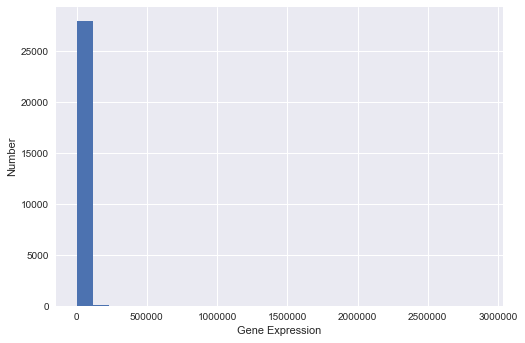

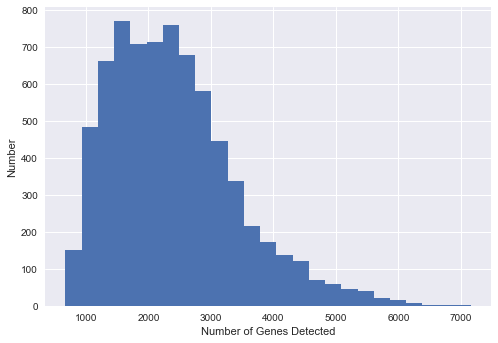

In [57]:
n_bins=int(np.sqrt(len(gene_expression)))
print n_bins
# Plot histogram of gene expression
_ = plt.hist(gene_expression, bins=25)
_ = plt.xlabel("Gene Expression")
_ = plt.ylabel("Number")
# Show histogram
plt.show()

# Plot histogram of genes detected per cell
_ = plt.hist(genesdetected, bins=25)
_ = plt.xlabel("Number of Genes Detected")
_ = plt.ylabel("Number")
# Show histogram
plt.show()


In [94]:
cpt.loc[featureData[featureData['Associated.Gene.Name'].isin(['ggfp','gmTomato'])].index,].to_csv('Filtered_log2cpm_mClust.csv')

In [126]:
x=cpt.loc[featureData[featureData['Associated.Gene.Name'].isin(['ggfp','gmTomato'])].index,]
gfp_tom= np.array([list(l) for l in zip(x.iloc[0],x.iloc[1])])
gfp_tom[0:,1]

array([ 1.89709977,  1.1990411 ,  2.65188238, ...,  2.79761631,
        3.12835788,  1.26546621])

[1 0 1 ..., 1 1 0]


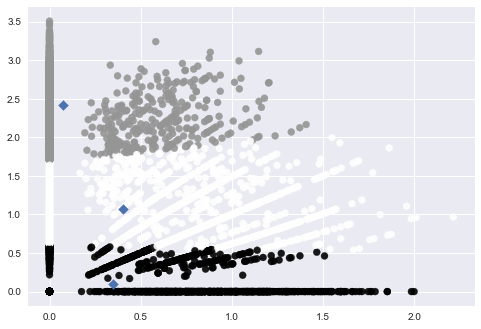

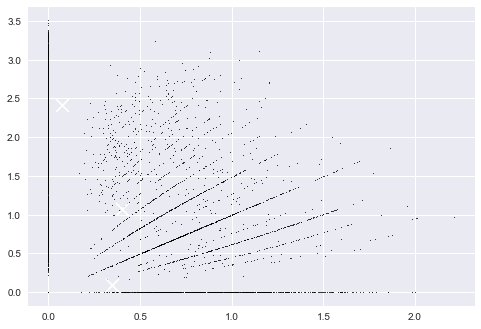

In [138]:
# Import KMeans
from sklearn.cluster import KMeans
# Create a KMeans instance with 3 clusters: model
model = KMeans(n_clusters=3)
# Fit model to points
model.fit(gfp_tom)
# Determine the cluster labels of new_points: labels
labels = model.predict(gfp_tom)
# Print cluster labels of new_points
print(labels)
#import matplotlib.pyplot as plt
# Assign the columns of new_points: xs and ys
xs = gfp_tom[:,0]
ys = gfp_tom[:,1]
    # Make a scatter plot of xs and ys, using labels to define the colors
_=plt.scatter(xs,ys, c=labels,alpha=0.9)
# Assign the cluster centers: centroids
centroids = model.cluster_centers_
# Assign the columns of centroids: centroids_x, centroids_y
centroids_x = centroids[:,0]
centroids_y = centroids[:,1]
# Make a scatter plot of centroids_x and centroids_y
_=plt.scatter(centroids_x,centroids_y, marker='D',s=50)
plt.show()
########
plt.plot(xs, ys, 'k.', markersize=2)
plt.scatter(centroids[:, 0], centroids[:, 1],
            marker='x', s=169, linewidths=3,
            color='w', zorder=10)
plt.show()

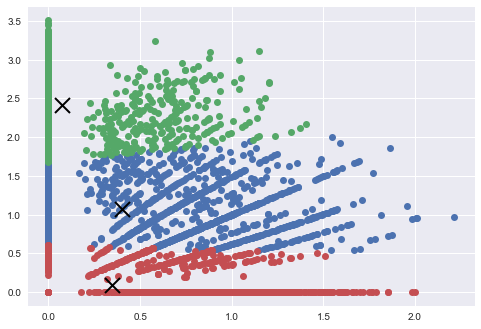

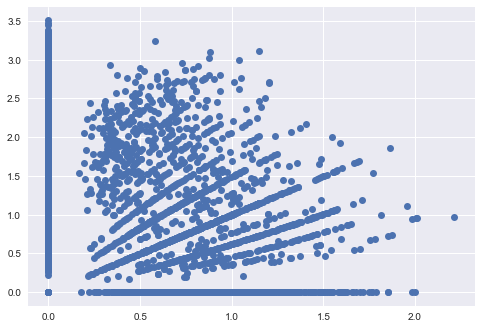

In [139]:
k=3
for i in range(k):
    # select only data observations with cluster label == i
    ds = gfp_tom[np.where(labels==i)]
    # plot the data observations
    plt.plot(ds[:,0],ds[:,1],'o')
    # plot the centroids
    lines = plt.plot(centroids[i,0],centroids[i,1],'kx')
    # make the centroid x's bigger
    plt.setp(lines,ms=15.0)
    plt.setp(lines,mew=2.0)
plt.show()

plt.plot(gfp_tom[:,0],gfp_tom[:,1],'o')
plt.show()

In [144]:
gfpCellsE=cpt.columns[(cpt.loc['gfp']>0) & (cpt.loc['mTomato']==0)]
mTomatoCellsE=cpt.columns[(cpt.loc['mTomato']>0) & (cpt.loc['gfp']==0)]

In [143]:
cpt.columns[(cpt.loc['gfp']>0) & (cpt.loc['mTomato']==0)]

Index([u'AAACCTGAGCCCAGCT-1', u'AAACCTGAGTCTCAAC-1', u'AAACCTGCAGGAACGT-1',
       u'AAACCTGGTCCATCCT-1', u'AAACCTGGTCCATGAT-1', u'AAACCTGGTCGCCATG-1',
       u'AAACCTGGTCGCTTTC-1', u'AAACCTGTCTCCGGTT-1', u'AAACGGGAGAGGTTGC-1',
       u'AAACGGGAGCATGGCA-1',
       ...
       u'TTTGGTTCACGTAAGG-1', u'TTTGGTTCATGCAACT-1', u'TTTGGTTGTGTTAAGA-1',
       u'TTTGGTTTCGGTGTCG-1', u'TTTGTCAAGTGCTGCC-1', u'TTTGTCACACGAAAGC-1',
       u'TTTGTCAGTGCAGGTA-1', u'TTTGTCAGTTACGGAG-1', u'TTTGTCATCATCGGAT-1',
       u'TTTGTCATCTGTCTCG-1'],
      dtype='object', length=3668)

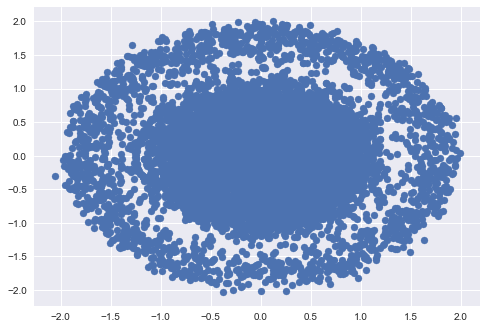

In [72]:
# Import TSNE
from sklearn.manifold import TSNE
# Create a TSNE instance: model
model = TSNE(learning_rate=200)
# Apply fit_transform to samples: tsne_features
tsne_features = model.fit_transform(cpt)
# Select the 0th feature: xs
xs = tsne_features[:,0]
# Select the 1st feature: ys
ys = tsne_features[:,1]
# Scatter plot, coloring by variety_numbers
_ = plt.scatter(xs,ys)
plt.show()

